# Nonnegative Matrix Factorization
**Written by Christian Alis**

PCA and SVD decompose the design matrix into two or three matrices that causes the data to be rotated and projected into orthogonal bases. By dropping some of these bases, the number of dimensions can be reduced. In the special case wherein the design matrix is nonnegative, another kind of matrix decomposition can be performed. This matrix decomposition is known as Nonnegative Matrix Factorization (NMF) and decomposes the design matrix into two matrices. Unlike in PCA and SVD wherein the resulting bases are orthogonal, the basis vectors of the decomposed matrix are not but the resulting matrices are nonnegative as well. This usually makes the decomposition easier to interpret.

Let $\mathbf D$ be our $n \times d$ design matrix. In NMF, we want to decompose it into $\mathbf{D} = \mathbf{UV}^T$ where $\mathbf U$ is an $n \times k$ nonnegative matrix and $\mathbf V$ is a $d \times k$ nonnegative matrix. $\mathbf U$ is the representation of $\mathbf D$ in the space defined by the columns of $\mathbf V$ as the basis vectors. The hidden dimensions $k$ are known as the latent factors.

An illustration of the matrices is shown below. We can think of $\mathbf{D}$ as a bag-of-words matrix, for example. The columns of $\mathbf{U}$ can be thought of as latent factors (or topics) and their values the affinity of each object (document) to the latent factor. Similarly, the columns of $\mathbf{V}$ (or the rows of $\mathbf{V}^T$) correspond to the latent factors and the rows the affinity of each original dimension to the latent factor.

<div style="text-align: center">
<img src="nmf.png" style="width: 30em" />
Figure from C. Aggarwal, Data Mining: The Textbook
</div>

The latent factor an object has the most affinity to can already be used to define a cluster. Another approach is to further perform clustering methods on $\mathbf{U}$.

## NMF on the Boston House Prices dataset

We again use the [Boston House Prices](http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset) dataset for illustration.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [9]:
bhp = load_boston()
print(bhp.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

We remove the indicator variable.

In [10]:
X = np.hstack((bhp.data[:,:3], bhp.data[:,4:]))
features = np.concatenate((bhp.feature_names[:3], bhp.feature_names[4:]))

We then perform NMF on `X`.

In [11]:
from sklearn.decomposition import NMF

nmf = NMF()
U = nmf.fit_transform(X)
V = nmf.components_.T

/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


The nonzero components of `V` are shown below. This can be used as a guide when naming the latent factors.

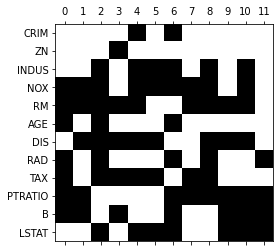

In [12]:
fig, ax = plt.subplots()
ax.spy(V)
ax.set_xticks(range(len(features)))
ax.set_yticks(range(len(features)))
ax.set_yticklabels(features);

We can cluster the houses by assigning them to the latent factor with the highest weight.

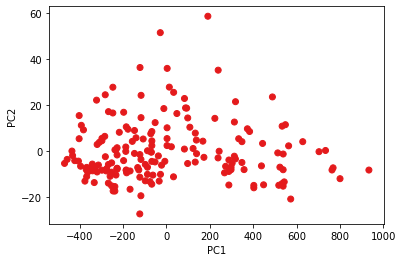

In [28]:
from sklearn.decomposition import PCA

pca = PCA(2)
plt.scatter(*pca.fit_transform(X).T, c=U.argmax(axis=1), cmap='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2');

Another approach is to perform clustering on the transformed data.

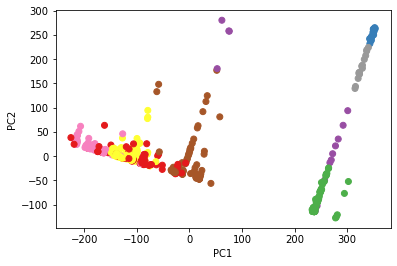

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans()
plt.scatter(*pca.fit_transform(X).T, c=kmeans.fit_predict(U), cmap='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2');

**Problem 10 [3 pts]**

Cluster the wines dataset with the help of NMF. Make sure to include the number of latent factors and its justification, as well as interpretation.

In [19]:
from sklearn.datasets import load_wine

wine = load_wine()
wine.keys()
wine['data']
# print(wine['DESCR'])
features = wine['feature_names']

In [20]:
X = np.array(wine.data)
# X = (X - X.mean(axis=0)) / X.std(axis=0)
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [21]:
from sklearn.decomposition import NMF

nmf = NMF()
U = nmf.fit_transform(X)
V = nmf.components_.T

/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


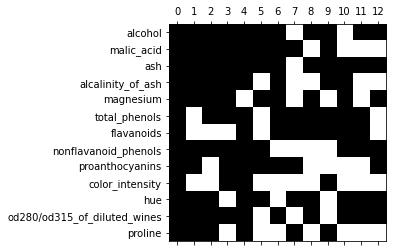

In [22]:
fig, ax = plt.subplots()
ax.spy(V)
ax.set_xticks(range(len(features)))
ax.set_yticks(range(len(features)))
ax.set_yticklabels(features);

INTERPRETATION:

The black shades corresponds to the non-zero values and the white corresponds to the zero values. For latent feature zero, all the features are shaded. For latent feature 1 all are shaded except total phenols, flavonoids and color intensity, so this latent feature can be related to the wine either being a red wine or white wine. For latent feature 3, flavonoids, proanthocyanics, color intensity have zero values, and this can be another attribute for white wine. It may be noted that all of the features here are equally important so we can look at the plot below (using PCA but the colors are based on NMF).

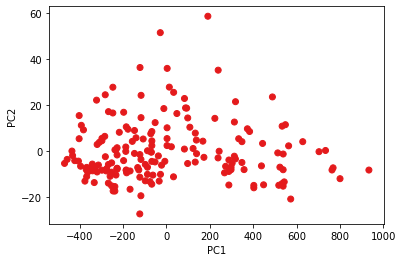

In [25]:
from sklearn.decomposition import PCA

pca = PCA(2)
plt.scatter(*pca.fit_transform(X).T, c=U.argmax(axis=1), cmap='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2');

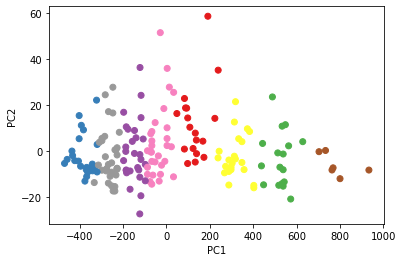

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans()
plt.scatter(*pca.fit_transform(X).T, c=kmeans.fit_predict(U), cmap='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2');

INTERPRETATION:

Based on NMF, there are 8 clusters/factors (based on the colors) on the transformed coordinates. Since there are only 8 clusters we can choose to look ath columns 0 to 7 representing latent features 0 to 7. 

We only look at the PCA graphs because the latent features plots show equal weights

# Reference
* C. Aggarwal, Data Mining: The Textbook, Chapter 6.